In [ ]:
!pip install pandas
!pip install matplotlib
!pip install openpyxl

In [9]:
import pandas as pd
def read_excel(path="data.xls"):
    """
    read the data from excel
    """
    data = pd.read_excel(path)
    x = data.columns.values[1:]
    x = x.astype(float)
    y = data.iloc[:, 0].values
    y = y.astype(float)
    z = data.iloc[:, 1:].values
    z = z.astype(float)
    return x, y, z

import numpy as np
def find_best_points(x_point, y_point, x_range, y_range):
    """
    Search for the maximum value within the given range around a specific point.
    :param x_data: pH values
    :param y_data: Fe/Cr values
    :param z_data: Corresponding z values
    :param x_point: Current pH
    :param y_point: Current Fe/Cr values
    :param x_range: Range of pH, [min, max]
    :param y_range: Range of Fe/Cr values, [min, max]
    :return: Returns the x and y values and the maximum z value.
    """
    x_data, y_data, z_data = read_excel()
    if y_point >= 9:
        y_point = 9
    if y_range[1] >= 9:
        y_range[1] = 9
    if x_point not in x_data:
        # Find the nearest point to x_point
        print("The pH data is not within the given range 6~14.")
        # return jsonify({"error": "The pH data is not within the given range 6~14."})
    if y_point not in y_data:
        # Find the nearest point to y_point
        y_point = y_data[np.argmin(np.abs(y_data - y_point))]
        print(y_point)
        # return jsonify({"error": "The Fe/Cr data is not within the given range 0~10."})
    
    # Find the index of x_point in x
    index_x = np.where(x_data == x_point)
    index_y = np.where(y_data == y_point)
    # Find the index of x_range in x
    index_x_min = np.where(x_data == x_range[0])
    index_x_max = np.where(x_data == x_range[1])
    # Find the index of y_range in y
    index_y_min = np.where(y_data == y_range[0])
    index_y_max = np.where(y_data == y_range[1])
    # Find the maximum z value within the range
    z_max = z_data[index_y, index_x]
    for i in range(index_x_min[0][0], index_x_max[0][0] + 1):
        for j in range(index_y_min[0][0], index_y_max[0][0] + 1):
            if z_data[j, i] > z_max:
                z_max = z_data[j, i]
                index_x = i
                index_y = j
    return x_data[index_x], y_data[index_y], z_max


#example
x_data, y_data, z_data = read_excel()

x_point = 7.0
y_point = 2.0
x_range = [6,7]
y_range = [1,3]
# Find the maximum value
x, y, z = find_best_points(x_point, y_point, x_range, y_range)
index_x = np.where(x_point == x_data)
index_y = np.where(y_point == y_data)
print("The pH value at the maximum point is:", x)
print("The Fe/Cr value at the maximum point is:", y)
print("The maximum value is:", z)
print("The free energy has changed by:", float(z - z_data[index_y, index_x]))
if z < 0:
    print("Iron-chromium ore cannot be formed")



The pH value at the maximum point is: 7.0
The Fe/Cr value at the maximum point is: 3.0
The maximum value is: 2.0
The free energy has changed by: 0.5


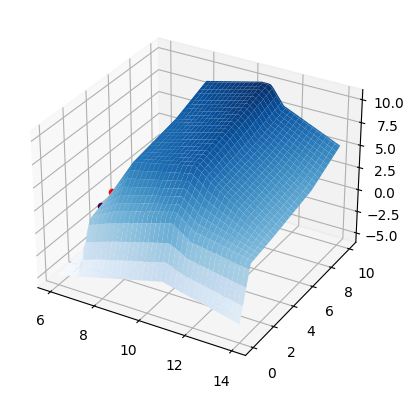

In [14]:
# to visualize the free energy change 

import numpy as np
import matplotlib.pyplot as plt

def plt_3d(x, y, z, cmap="viridis"):
    plt.figure()
    ax = plt.axes(projection="3d")
    x_, y_ = np.meshgrid(x, y)
    ax.plot_surface(x_, y_, z, cmap=cmap)
    plt.show()


def show_points(x, y, z, x_point, y_point, cmap="viridis"):
    """
    Highlight the point corresponding to x, y coordinates in a 3D plot.
    :param x:
    :param y:
    :param z:
    :param x_point: pH
    :param y_point: Fe/Cr
    :param cmap:
    :return:
    """
    # Find the index of x_point in x
    index_x = np.where(x == x_point)
    index_y = np.where(y == y_point)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    x_, y_ = np.meshgrid(x, y)
    ax.plot_surface(x_, y_, z, cmap=cmap, zorder=0)
    ax.scatter(x_point, y_point, z[index_y, index_x], c=40, s=20, marker="o", zorder=10)
    plt.show()


def show_two_points(x, y, z, x_point_1, y_point_1, x_point_2, y_point_2, cmap="Blues"):
    """
    Highlight two points corresponding to x, y coordinates in a 3D plot.
    :param x:
    :param y:
    :param z:
    :param x_point_1: pH
    :param y_point_1: Fe/Cr
    :param x_point_2: pH
    :param y_point_2: Fe/Cr
    :param cmap:
    :return:
    """
    # Find the index of x_point in x
    index_x_1 = np.where(x == x_point_1)
    index_y_1 = np.where(y == y_point_1)
    index_x_2 = np.where(x == x_point_2)
    index_y_2 = np.where(y == y_point_2)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    x_, y_ = np.meshgrid(x, y)
    ax.plot_surface(x_, y_, z, cmap=cmap, zorder=10)
    ax.scatter(
        x_point_1,
        y_point_1,
        z[index_y_1, index_x_1],
        c=40,
        s=20,
        marker="o",
        zorder=1,
    )
    ax.scatter(
        x_point_2,
        y_point_2,
        z[index_y_2, index_x_2],
        c="r",
        s=20,
        marker="o",
        zorder=1,
    )
    plt.show()


# example

show_two_points(x_data, y_data, z_data, x_point, y_point, x, y)


In [18]:


def abiotic_remediation_calculate(fe_2, fe_3, fe_total, cr_3, cr_6, cr_total, pH, pH_min, pH_max):
    """
    Calculate abiotic remediation.
    Note: Among fe_2, fe_3, and fe_total, two are known.
    :param fe_2: Amount of Fe2+
    :param fe_3: Amount of Fe3+
    :param fe_total: Total amount of Fe
    :param cr_3: Amount of Cr3+
    :param cr_6: Amount of Cr6+
    :param cr_total: Total amount of Cr
    :param pH: pH value
    :param pH_min: Minimum pH value
    :param pH_max: Maximum pH value
    """
    if fe_2 is None:
        fe_2 = fe_total - fe_3
    if fe_3 is None:
        fe_3 = fe_total - fe_2
    if cr_3 is None:
        cr_3 = cr_total - cr_6
    if cr_6 is None:
        cr_6 = cr_total - cr_3
    origin_fe_cr = (fe_2 + fe_3) / (cr_3 + cr_6)
    pH_best, fe_cr_best, z = find_best_points(pH, origin_fe_cr, [pH_min, pH_max], [0, 10])
    if origin_fe_cr >= fe_cr_best:
        fe_2_add = 4 * cr_6 + cr_3 - fe_2
        if fe_2_add < 0:
            fe_2_add = "{:.2f}".format(0)
        else:
            fe_2_add = "{:.2f}".format(4 * cr_6 + cr_3 - fe_2)
        fe_3_add = "{:.2f}".format(0)
        pH_best = "{:.1f}".format(pH_best)
    else:
        fe_2_add = cr_3 + 4 * cr_6 - fe_2
        fe_3_add = ((fe_cr_best / origin_fe_cr) - 1) * (fe_3 + 3 * cr_6)
        # Round to two decimal places
        fe_2_add = "{:.2f}".format(fe_2_add)
        fe_3_add = "{:.2f}".format(fe_3_add)
        pH_best = "{:.1f}".format(pH_best)
    return fe_2_add, fe_3_add, pH_best

def biotic_remediation_calculate(fe_2, fe_3, fe_total, cr_3, cr_6, cr_total, pH, pH_min, pH_max):
    """
    Calculate biotic remediation.
    Note: Among fe_2, fe_3, and fe_total, two are known.
    :param fe_2: Amount of Fe2+
    :param fe_3: Amount of Fe3+
    :param fe_total: Total amount of Fe
    :param cr_3: Amount of Cr3+
    :param cr_6: Amount of Cr6+
    :param cr_total: Total amount of Cr
    :param pH: pH value
    :param pH_min: Minimum pH value
    :param pH_max: Maximum pH value
    """
    if fe_2 is None:
        fe_2 = fe_total - fe_3
    if fe_3 is None:
        fe_3 = fe_total - fe_2
    if cr_3 is None:
        cr_3 = cr_total - cr_6
    if cr_6 is None:
        cr_6 = cr_total - cr_3
    origin_fe_cr = ((fe_2 + fe_3) - (cr_3 + cr_6)) / (cr_3 + cr_6)
    pH_best, fe_cr_best, z = find_best_points(pH, origin_fe_cr, [pH_min, pH_max], [0, 10])
    if origin_fe_cr >= fe_cr_best:
        fe_add = "{:.2f}".format(0)
        pH_best = "{:.1f}".format(pH_best)
    else:
        fe_add = ((fe_cr_best / origin_fe_cr) - 1) * ((fe_2 + fe_3) - (cr_3 + cr_6))
        # Round to two decimal places
        fe_add = "{:.2f}".format(fe_add)
        pH_best = "{:.1f}".format(pH_best)
    return fe_add, pH_best


#example
fe_2 = 1000
fe_3 = 1000
fe_total = 2000
cr_3 = 10
cr_6 = 10
cr_total = 20
pH = 7
pH_min = 6
pH_max = 14
print("the abiotic remediation result,fe_2_add, fe_3_add, pH_best:")
print(abiotic_remediation_calculate(fe_2, fe_3, fe_total, cr_3, cr_6, cr_total, pH, pH_min, pH_max))

print("the biotic remediation result, fe_add, pH_best")
print(biotic_remediation_calculate(fe_2, fe_3, fe_total, cr_3, cr_6, cr_total, pH, pH_min, pH_max))



the abiotic remediation result,fe_2_add, fe_3_add, pH_best:
('0.00', '0.00', '10.7')
the biotic remediation result, fe_add, pH_best
('0.00', '10.7')
